## Task
- Your case study is to build a linear regression model using L1 or L2 regularization (or both) the task to predict the Critical Temperature as closely as possible. 
- In addition, include in your write-up which variable carries the most importance.
When you save your assignment, the file name should be "First Name_Last Name_Assignment Name."

## Team
- Erin McClurePrice
- Alex Lopez
- Zach Bunn
- Josh Mitchell

In [2]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge, Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('superconduct\\train.csv')
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


drop unused columns

In [4]:
elem = pd.read_csv('superconduct\\unique_m.csv')
elem.drop(elem.columns[-1], axis=1, inplace=True)
elem.drop(elem.columns[-1], axis=1, inplace=True)


Join the data frames

In [5]:
data = pd.concat([df, elem], axis=1)
print(data.head())
print(data.keys())

   number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607           

In [35]:
#for key in data.keys():
#    plt.hist(data[key])
#    plt.xlabel(key)
#    plt.show()

drop excess columns

In [6]:
data.describe()
keys = data.keys()
print([k for k in keys])


['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffini

separate X and y

In [7]:
y = data.critical_temp
print(y)


0         29.00
1         26.00
2         19.00
3         22.00
4         23.00
          ...  
21258      2.44
21259    122.10
21260      1.98
21261      1.84
21262     12.80
Name: critical_temp, Length: 21263, dtype: float64


In [8]:
X = data.drop(['critical_temp'], axis=1)
print(X)

       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787   

scale the data

In [9]:
scale = StandardScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
print(X_scaled.describe())

       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        2.126300e+04      2.126300e+04          2.126300e+04   
mean         2.138679e-17     -2.085212e-16         -4.384292e-16   
std          1.000024e+00      1.000024e+00          1.000024e+00   
min         -2.164461e+00     -2.716578e+00         -1.987627e+00   
25%         -7.748586e-01     -5.088171e-01         -6.224159e-01   
50%         -8.005750e-02     -8.878888e-02         -3.670313e-01   
75%          6.147436e-01      4.329042e-01          3.916207e-01   
max          3.393948e+00      4.091643e+00          4.060724e+00   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       2.126300e+04           2.126300e+04         2.126300e+04   
mean       -8.287382e-17           2.138679e-17         1.710943e-16   
std         1.000024e+00           1.000024e+00         1.000024e+00   
min        -2.126040e+00          -1.543759e+00        -3.194131e+00   
25%        -4.2699

add report helper function
function will go into the gridsearch_cv results and get the best candidates

In [10]:
def report(results, n_top=3):
    for i in range(1, n_top+1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print(
                'Mean validation score: {0:.3f} (std: {1:.3f})'.format(
                    results['mean_test_score'][candidate],
                    results['std_test_score'][candidate],
                )
            )
            print('Parameters: {0}'.format(results['params'][candidate]))
            print('')

Use lasso to select explanatory variables 

In [16]:
model = Lasso()
param_dist = {
    'alpha':np.logspace(-1,1,100)
}
grid_search = GridSearchCV(model, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_scaled, y)
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: -368.249 (std: 147.825
Parameters: {'alpha': 0.22051307399030456}

Model with rank: 2
Mean validation score: -368.275 (std: 148.651
Parameters: {'alpha': 0.23101297000831597}

Model with rank: 3
Mean validation score: -368.354 (std: 146.951
Parameters: {'alpha': 0.2104904144512021}



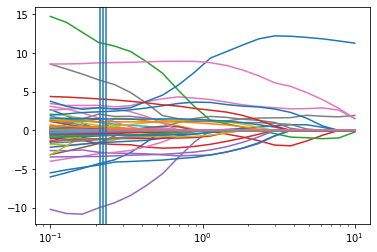

In [20]:
model = Lasso()
vi = []
for i in np.logspace(-1,1,20):
    model.alpha = i
    model.fit(X_scaled, y)
    vi.append(model.coef_)

V = pd.DataFrame(np.array(vi), columns=X_scaled.columns)
for i in V.columns:
    plt.plot(np.logspace(-1,1,20), V[i], label=i)
plt.xscale('log')
plt.axvline(x=0.2205) # best alpha
plt.show()

In [24]:
model = Ridge()
param_dist = {
    'alpha':np.logspace(-100,100,1000)
}
grid_search = GridSearchCV(model, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_scaled, y)
report(grid_search.cv_results_)

C:\Users\research_laptop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.15811e-106): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\research_laptop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.16507e-106): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\research_laptop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.31508e-106): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=

Model with rank: 1
Mean validation score: -373.974 (std: 152.380
Parameters: {'alpha': 2010.4964162605258}

Model with rank: 2
Mean validation score: -375.565 (std: 146.512
Parameters: {'alpha': 1267.952846786452}

Model with rank: 3
Mean validation score: -376.684 (std: 160.571
Parameters: {'alpha': 3187.8912926776884}



lassocv

Text(0, 0.5, 'weights')

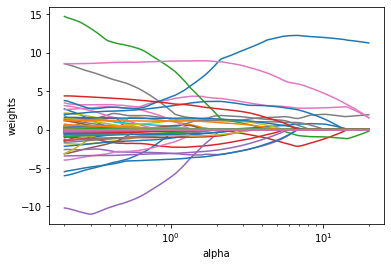

In [25]:
alphas = np.logspace(-1,1,100)
model = Lasso()
coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_scaled, y)
    coefs.append(model.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [26]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100000)
lassocv.fit(X_scaled, y)

model.set_params(alpha=lassocv.alpha_)
model.fit(X_scaled, y)
mean_squared_error(y, model.predict(X_scaled))


313.4623166035968

In [34]:
model.alpha


0.23040991534506494

print out features sorted by importance

In [ ]:
m_dict = dict(zip(X_scaled.columns, model.coef_))
for k in sorted(m_dict, key=lambda k: m_dict[k], reverse=True):
    print(k,m_dict[k])

wtd_mean_ThermalConductivity 11.141453749495117
Ba 8.751591229500894
range_atomic_mass 6.289794106107832
Bi 4.020012856964288
wtd_entropy_atomic_mass 3.170956688487282
wtd_std_ThermalConductivity 2.879457217179056
wtd_entropy_ThermalConductivity 2.8439634692879983
Ca 2.4364749882765637
range_atomic_radius 2.0119354606693713
Hg 1.49312789809409
wtd_entropy_FusionHeat 1.3803298519551959
gmean_fie 1.1380537151547396
Tl 1.1217269834045462
std_ElectronAffinity 0.9235793690304785
wtd_range_Density 0.8693721389170621
wtd_range_Valence 0.5045668073326122
Sr 0.486013154722771
wtd_gmean_FusionHeat 0.4645784824340108
Nb 0.36450263123988885
Rb 0.3371223636048646
mean_fie 0.3225742620535725
Lu 0.31983576877013764
Li 0.3051184837040415
entropy_ThermalConductivity 0.2922582649525925
range_Valence 0.18557944441286728
V 0.17967797185987666
K 0.14309914225551362
Yb 0.09319024938991723
Tc 0.05028214573320711
Cs 0.042420887251626495
C 0.04218126649558613
Pb 0.03254460713936903
F 0.022262134859165103
Ga 0.

In [49]:
s_vals = sorted(m_dict, key=lambda k: m_dict[k], reverse=True)[0:10]
s_vals.append('critical_temp')
print(s_vals)

['wtd_mean_ThermalConductivity', 'Ba', 'range_atomic_mass', 'Bi', 'wtd_entropy_atomic_mass', 'wtd_std_ThermalConductivity', 'wtd_entropy_ThermalConductivity', 'Ca', 'range_atomic_radius', 'Hg', 'critical_temp']


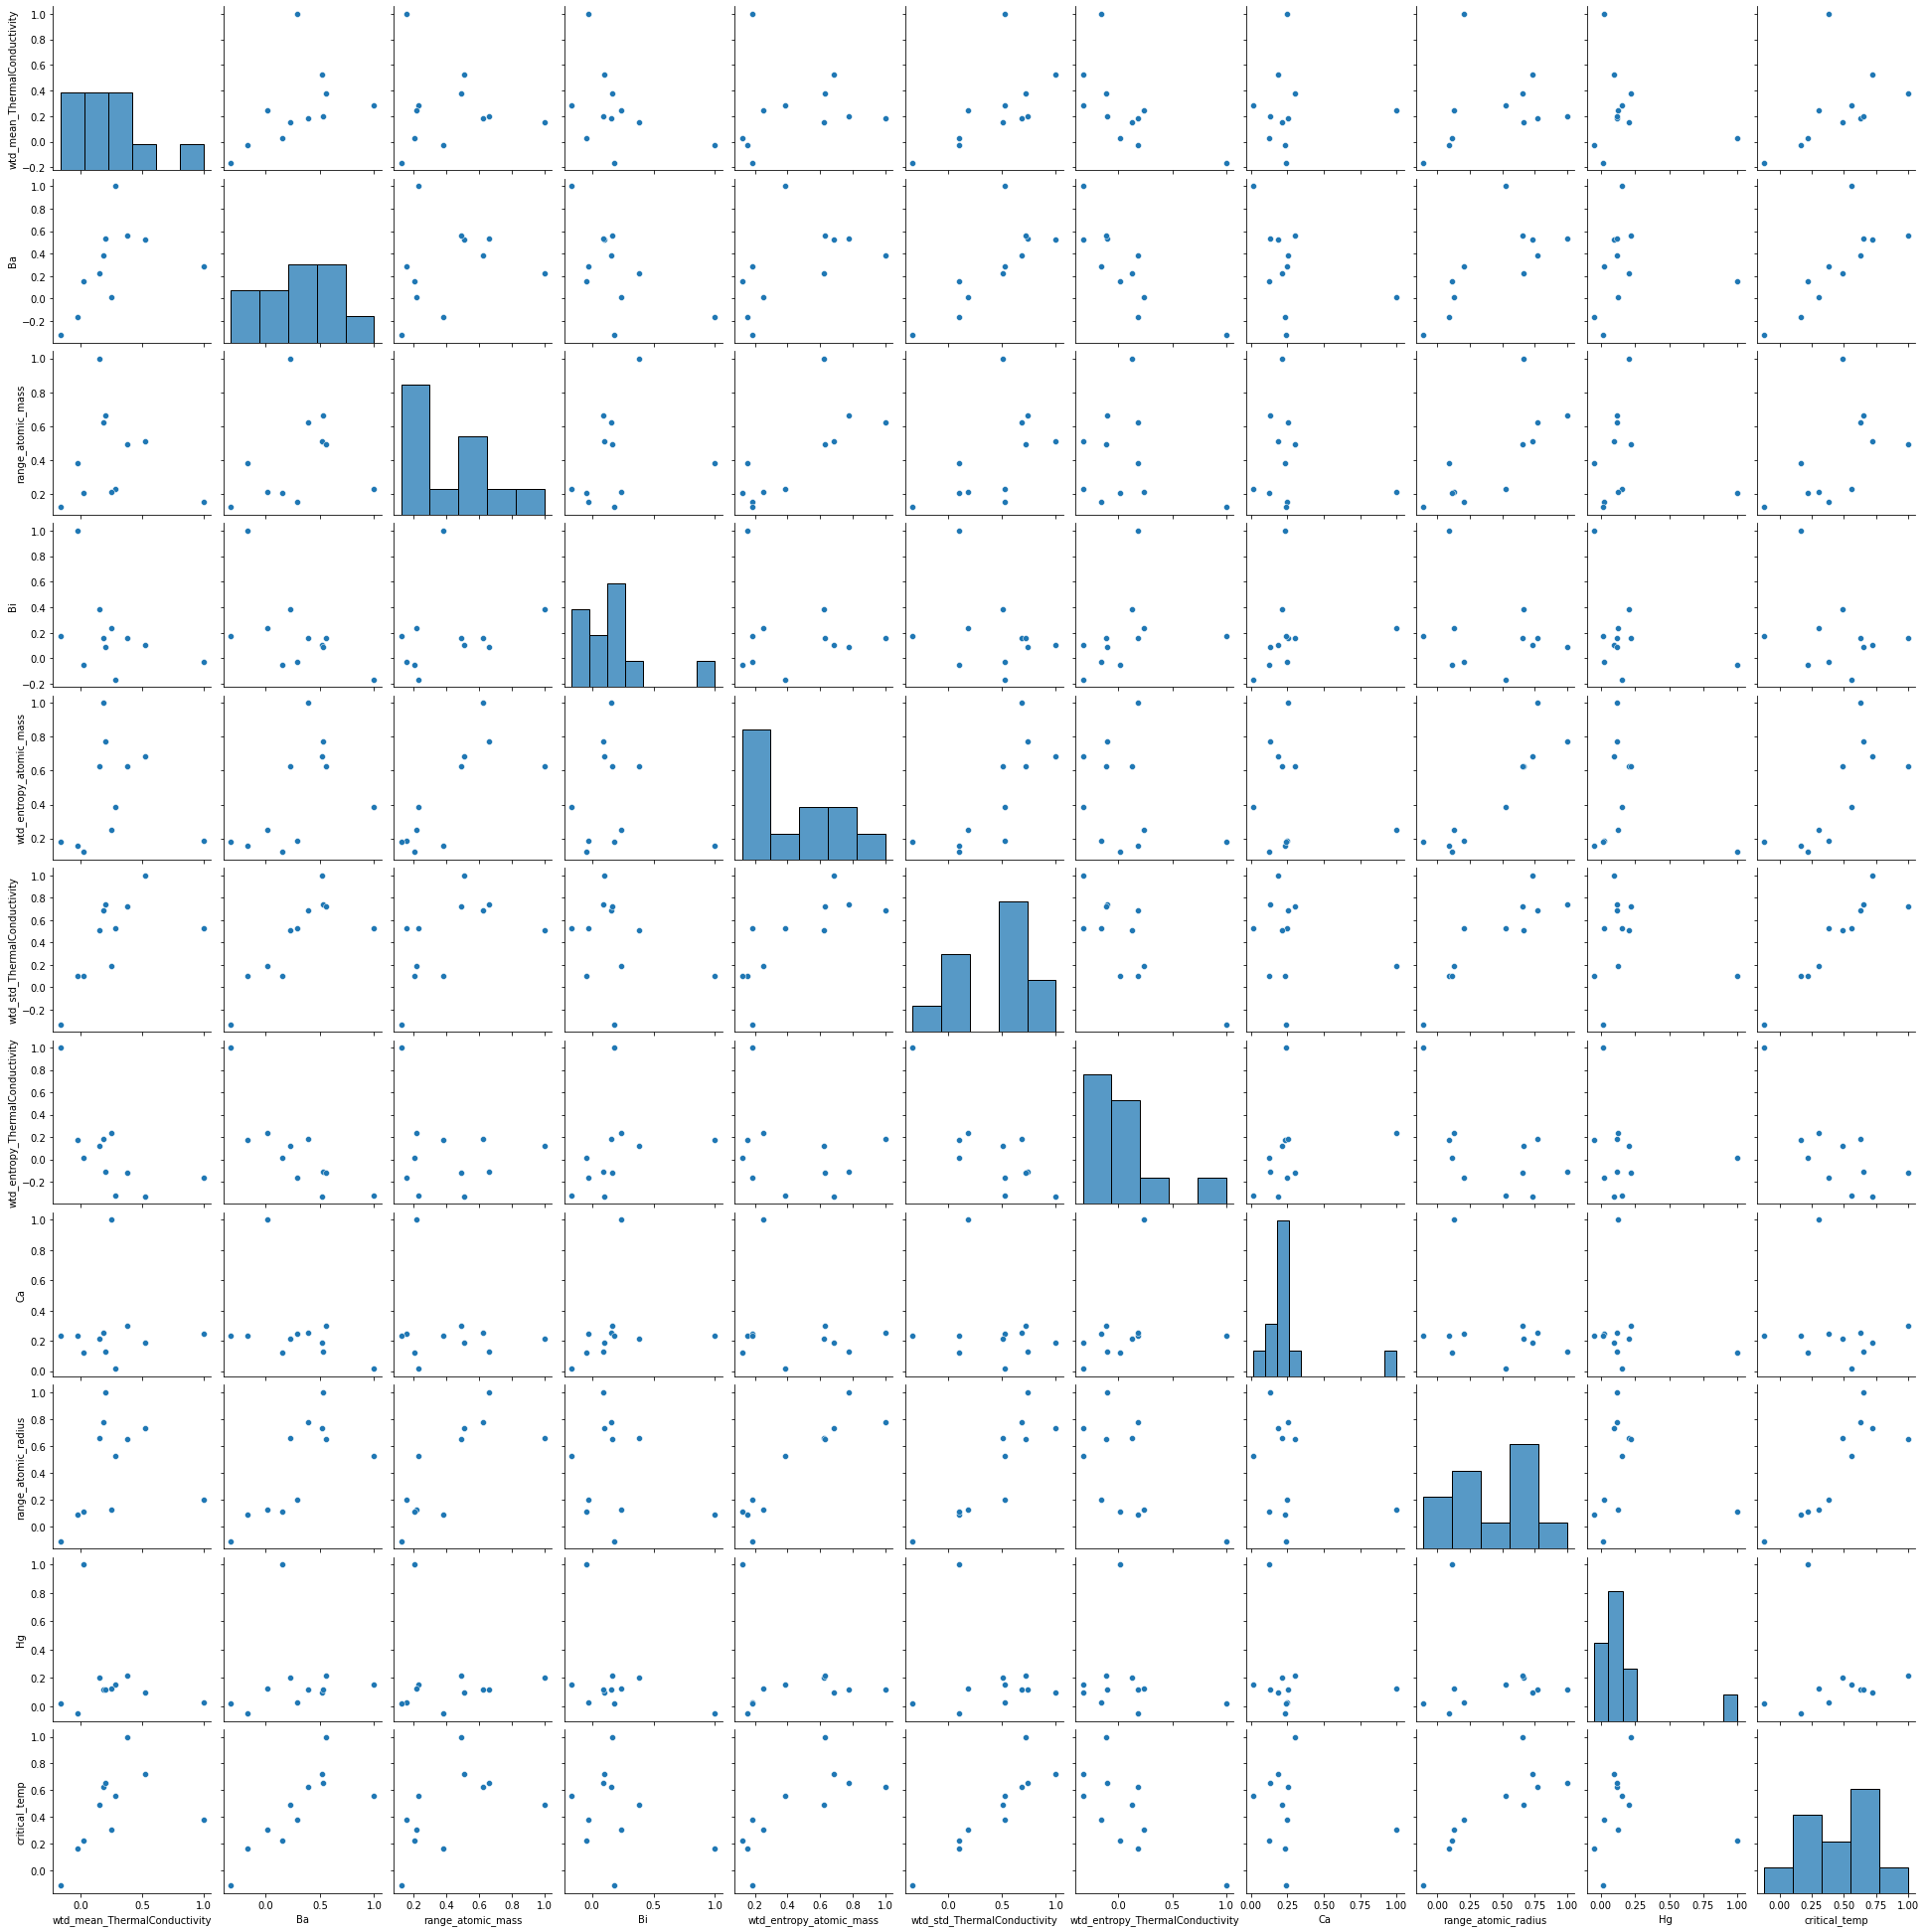

In [52]:
import seaborn as sns
important_vars = data[s_vals]
g = sns.pairplot(important_vars.corr(), vars=s_vals)

['wtd_mean_ThermalConductivity', 'Ba', 'range_atomic_mass', 'Bi', 'wtd_entropy_atomic_mass', 'wtd_std_ThermalConductivity', 'wtd_entropy_ThermalConductivity', 'Ca', 'range_atomic_radius', 'Hg']


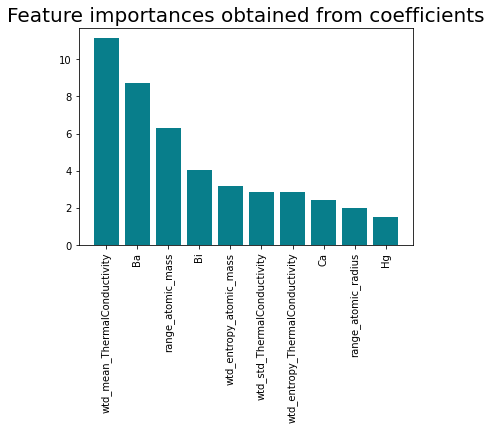

In [75]:
tmp = s_vals[:-1]
print(tmp)
out = []
for t in tmp:
    out.append(m_dict[t])

plt.bar(x=tmp, height=out, color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()